Solving a scaled version of the Multi-Armed Bandits Problem

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Importing the simulation dataset 

In [12]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

In [13]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


situation description :- <br>
dataset represents records of responses of the advertisements of a product on a social network;
1 is a click on the advert and 0 is the advert being ignored.<br>
CTR = click through rate

the columns represent 10 versions of the same ad<br>
if the user (represented on a row) clicks on an ad, we get a reward of 1 and if no, we don't get any reward

This is not known to us while implementing the model

final goal is the maximise the reward

### Random selection implementation 

the code for selecting a version of the ad randomly

In [24]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [25]:
total_reward

1240

This is our base comparison model:- if the ads are selected randomly for a user 

will be comparing this to our upper confidence bound model for an idea how the model balances between exploration and exploitation to maximise reward while knowing that this is not the just good but the best choice..

###  results for a random model

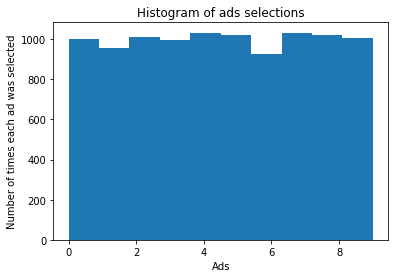

In [26]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### Implementing UCB now  
<h5>(without external packages)</h5>

the algorithm is described here:-
    

<img src="UCB_Algorithm_Slide.png"> 

## <center>read more on the $\Delta_i (n)$ from several sources before moving on</center>

declaring variables

In [40]:
NOS = np.zeros(d)
# no of selections of a version 
# of the ad (dynamically updated)

SOR = np.zeros(d)
# no of rewards of that version 
# (dynamically updated)

SA = []
#will be appending 
# list of selected ads

Looping through the records for implementing step 2 and 3

N & d have already been declared while implementing the random model

In [41]:
for n in range(0,N):
    ad   =0 #stores the ad version index with MUCB
    MUCB =0 #the maximum upper confidence bound
    for i in range(0,d):
        #if the ad version has atleast been tested once
        if(NOS[i]>0):
            average_reward = SOR[i]/NOS[i]
            Delta_i = math.sqrt(1.5*math.log(n+1)/NOS[i])
            UCB = average_reward + Delta_i
        else:
            UCB = 1e400 
#             setting it to a large value
#             for allowing fair exploration 
#             to occur before we exploit 
        if(UCB>MUCB):
            MUCB = UCB
            ad = i
#   appending the selected ad
    SA.append(ad)
#   incrementing the selected ad's no of selections
    NOS[ad]+=1
#   updating the real reward 
#   (from our simulation dataset)
    SOR[ad]+=dataset.values[n,ad]
    
Total_reward = sum(SOR)      

In [42]:
Total_reward

2178.0

twice as much compared to the random model- so that's good..

Plotting the Histogram for the selected ads for getting an idea of the version with the highest upper confidence bound

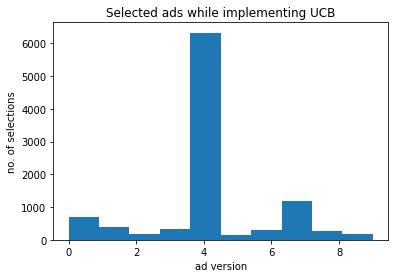

In [44]:
plt.hist(SA)
plt.title("Selected ads while implementing UCB")
plt.xlabel("ad version")
plt.ylabel("no. of selections")
plt.show()

so, clearly - the ad version indexed 4 is the one with the highest upper confidence bound for most of the iterations in the loop 

this can also be seen by seeing the last entries of the selected ads as by this point of time, the algorithm has explored and will be focusing on exploiting the options for maximising the reward 

In [53]:
print(SA[-10:])


[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


this makes it clearer